### Day 4 Summary

| Function           | Description                                | Argument                       | Example                                                | In words                                  |
|--------------------|--------------------------------------------|--------------------------------|--------------------------------------------------------|-------------------------------------------|
| `df.rename()`        | Rename index or columns                    | dictionary(key=old, value=new) | `df.rename(columns={'old':'new'})`                       | column 'old' is now called 'new'          |
| `df.drop()`          | Drops indices or columns                   | list(values to drop)           | `df.drop(columns=['station','attributes'])`              | no longer includes station and attributes |
| `df[column].apply()` | Apply function to column                   | lambda entry: func(entry)      | `df['place'].apply(lambda x: x == 'CA')`                 | returns true when the place is 'CA'       |
| `df.assign()`        | Applies functions, creating new columns | new = lambda row: func(row)    | `df.assign(temp_F = lambda row: row['temp_C']*9/5+32)` | creates column 'temp_F' of Fahrenheit temps |

All functions output a changed dataframe but leave `df` as is. You need to call `df = df.func(...)` to change `df` itself.

## Querying for San Francisco weather data

In [ ]:
import requests
import pandas as pd

def make_request(endpoint, payload = None):
  """
  Make a request to the weather API, passing the endpoint
  and payload

  Parameters:
  - endpoint: the API provides several endpoints
  - payload: a dictionary of items specifying the request

  Returns:
  - A response object
  """
  return requests.get(
      f'https://www.ncei.noaa.gov/cdo-web/api/v2/{endpoint}',
      headers={
          'token': 'ClrbcNSEeBKQrhSQeiWqRBHkpbKGiZAI'
      },
      params=payload
  )

# San Francisco Airport Daily Temperature Data
response = make_request(
    endpoint = 'data', 
    payload={
        'datasetid':'GHCND', 
        'datatypeid': ['TMAX','TMIN','TAVG'],
        'locationid': 'CITY:US060031',
        'stationid': 'GHCND:USW00023234',
        'startdate':'2022-06-26',
        'enddate':'2022-07-26',
        'limit': 100
        }
    )
output = response.json()

df = pd.DataFrame(output['results'])

df = df.drop(columns=['station','attributes'])

# To save memory, the values are integers (120 instead of 12.0)
# We need to convert them back to floating point numbers (numbers with decimals)
df.loc[:,'value'] = df['value'].apply(lambda value: value/10)

df = df.rename(
    columns = {'value':'temp_C'}
    )

df.loc[:,'date'] = pd.to_datetime(df.date)

wide_df = df.pivot(
    index='date',
    columns = 'datatype',
    values = 'temp_C'
)

In [ ]:
wide_df

datatype,TAVG,TMAX,TMIN
date,,,
2022-06-26,15.8,20.0,12.2
2022-06-27,15.7,20.6,12.8
2022-06-28,15.8,21.1,12.2
2022-06-29,15.8,19.4,12.8
2022-06-30,14.6,16.7,12.8
2022-07-01,14.7,19.4,12.8
2022-07-02,14.4,17.8,12.8
2022-07-03,15.2,18.3,13.3
2022-07-04,17.2,26.1,14.4


In [ ]:
wide_df.assign(
    TAVG_F = lambda row: row['TAVG']*9/5+32
)

datatype,TAVG,TMAX,TMIN,TAVG_F
date,,,,
2022-06-26,15.8,20.0,12.2,60.44
2022-06-27,15.7,20.6,12.8,60.26
2022-06-28,15.8,21.1,12.2,60.44
2022-06-29,15.8,19.4,12.8,60.44
2022-06-30,14.6,16.7,12.8,58.28
2022-07-01,14.7,19.4,12.8,58.46
2022-07-02,14.4,17.8,12.8,57.92
2022-07-03,15.2,18.3,13.3,59.36
2022-07-04,17.2,26.1,14.4,62.96


In [ ]:
wide_df

datatype,TAVG,TMAX,TMIN
date,,,
2022-06-26,15.8,20.0,12.2
2022-06-27,15.7,20.6,12.8
2022-06-28,15.8,21.1,12.2
2022-06-29,15.8,19.4,12.8
2022-06-30,14.6,16.7,12.8
2022-07-01,14.7,19.4,12.8
2022-07-02,14.4,17.8,12.8
2022-07-03,15.2,18.3,13.3
2022-07-04,17.2,26.1,14.4


In [ ]:
response = make_request(endpoint = 'datatypes', payload={'datasetid':'GHCND', 'datacategoryid': 'PRCP'})
response.ok

True

### Using a class

In [ ]:
instance = Weather_Api()
response = instance.make_request(
    endpoint = 'data', 
    payload={
        'datasetid':'GHCND', 
        'datatypeid': ['TMAX','TMIN','TAVG'],
        'locationid': 'CITY:US060031',
        'stationid': 'GHCND:USW00023234',
        'startdate':'2022-06-26',
        'enddate':'2022-07-26',
        'limit': 100
        }
    )
print(response.ok)

True


In [ ]:
class Weather_Api:
  def __init__(self):
    self.a = 2
  
  def increment_a(self):
    self.a += 1

In [ ]:
token = 'ClrbcNSEeBKQrhSQeiWqRBHkpbKGiZAI'

In [ ]:
instance = Weather_Api()
abc = instance.data_request();

Request successful
Here's the metadata:
{'resultset': {'offset': 1, 'count': 93, 'limit': 600}}


Long-form data

In [ ]:
pd.DataFrame(abc['results'])

,date,datatype,station,attributes,value
0,2022-06-26T00:00:00,TAVG,GHCND:USW00023234,"H,,S,",158
1,2022-06-26T00:00:00,TMAX,GHCND:USW00023234,",,D,2400",200
2,2022-06-26T00:00:00,TMIN,GHCND:USW00023234,",,D,2400",122
3,2022-06-27T00:00:00,TAVG,GHCND:USW00023234,"H,,S,",157
4,2022-06-27T00:00:00,TMAX,GHCND:USW00023234,",,D,2400",206
...,...,...,...,...,...
88,2022-07-25T00:00:00,TMAX,GHCND:USW00023234,",,D,2400",217
89,2022-07-25T00:00:00,TMIN,GHCND:USW00023234,",,D,2400",128
90,2022-07-26T00:00:00,TAVG,GHCND:USW00023234,"H,,S,",173
91,2022-07-26T00:00:00,TMAX,GHCND:USW00023234,",,D,2400",228


In [ ]:
instance.data_request(startdate = '2022-05-26');

Request successful
Here's the metadata:
{'resultset': {'offset': 1, 'count': 186, 'limit': 600}}


In [ ]:
instance._response['results'][0]

{'attributes': 'H,,S,',
 'datatype': 'TAVG',
 'date': '2022-05-26T00:00:00',
 'station': 'GHCND:USW00023234',
 'value': 167}

In [ ]:
import requests
import pandas as pd
import numpy as np

class Weather_Api:

  """
  A class to make weather requests to the API and return 
  a cleaned, wide-form dataframe.

  Attributes:
    token: the token to access the API
    _response: internally stores the response of data requests
    _wide_df: internally stores the wide dataframe

  Methods: 
    __init__: constructor
    _make_request: private method to request data from the API
    data_request: public method to request data from the API
    format_data: public method to clean and convert data to wide_form dataframe
  """

  def __init__(self, token='ClrbcNSEeBKQrhSQeiWqRBHkpbKGiZAI'):
    self.token = token
    self._response = None
    self._wide_df = None
  
  def make_request(self, endpoint, payload = None):
    """
    Private skeleton method to request data from the weather API, 
    passing the endpoint and payload.

    Parameters:
    - endpoint: the API provides several endpoints
    - payload: a dictionary of items specifying the request

    Returns:
    - A response object
    """
    return requests.get(
        f'https://www.ncei.noaa.gov/cdo-web/api/v2/{endpoint}',
        headers={
            'token': self.token
        },
        params=payload
    )
      
  def data_request(self,
      datasetid = 'GHCND', 
      datatypeid = ['TMAX','TMIN','TAVG'], 
      stationid = 'GHCND:USW00023234', # San Francisco Airport Daily Temperature Data
      startdate = '2022-06-26',
      enddate = '2022-07-26',
      limit = 600 # maximum allowed
  ):
    """
    Make a request to the weather API with endpoint 'data',
    specifying various parameters.

    Parameters:
    - datasetid: the id of the dataset
    - datatypeid: the ids of the datatype
    - stationid: the id of the station
    - startdate: the start date
    - enddate: the end date
    - limit: the maximum number of datapoints downloaded

    Returns:
    - A response object
    """

    self._response =  self.make_request(
      endpoint = 'data', 
      payload={
          'datasetid': datasetid, 
          'datatypeid': datatypeid,
          'stationid': stationid,
          'startdate': startdate,
          'enddate': enddate,
          'limit': limit
          }
      )
    if self._response.ok:
      self._response = self._response.json()
      print('Request successful')
      print('Here\'s the metadata:')
      print(self._response['metadata'])
    else:
      print('Request unsuccessful')
    return self._response
    
    
  def format_data(self,response=None,Tcols = ['TMAX','TMIN','TAVG']):
    """
    Takes a response object and turn it into a wide-form dataframe.
    The temperature-columns are divided by 10.
    Irrelevant columns are dropped.
    The index is converted to DateTime.

    Parameters:
    - response: the response object (if not using the internal one)
    - Tcols: the temperature columns of the query - to be divided by 10

    Returns:
    - A wide-form dataframe
    """
    if (response != None):
      self._response = response
    if (self._response == None):
      raise NameError('No valid response object')     
    self._wide_df = pd.DataFrame(self._response['results'])\
              .drop(columns=['station','attributes'])\
              .assign(value = lambda which_col: 
                          np.where(which_col.datatype.apply(lambda row: row in Tcols),
                                  which_col.value/10,
                                  which_col.value) # the second lambda is necessary because the operation is vectorized under the hood
              ).pivot(
                  index = 'date',
                  columns = 'datatype',
                  values = 'value'
              )
    self._wide_df.index = pd.to_datetime(self._wide_df.index)
    return self._wide_df

In [ ]:
instance = Weather_Api()
instance.data_request(startdate = '2022-03-01', datatypeid = ['TMAX','TMIN','TAVG','PRCP']);

Request successful
Here's the metadata:
{'resultset': {'offset': 1, 'count': 592, 'limit': 600}}


In [ ]:
abc['2022-04']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


datatype,PRCP,TAVG,TMAX,TMIN
date,,,,
2022-04-01,0.0,12.5,19.4,8.3
2022-04-02,0.0,13.3,22.8,8.9
2022-04-03,0.0,14.0,17.2,9.4
2022-04-04,0.0,12.9,17.8,10.6
2022-04-05,0.0,13.6,19.4,10.0
2022-04-06,0.0,15.1,28.3,9.4
2022-04-07,0.0,19.7,31.7,13.3
2022-04-08,0.0,19.6,20.6,10.6
2022-04-09,0.0,13.5,18.3,9.4


## Looking at the Iris data

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data

In [ ]:
y = iris.target

In [ ]:
import pandas as pd
X = pd.DataFrame(X,columns=['Sepal length','Sepal width','Petal Length','Petal Width'])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

y == 0: Setosa

y == 1: Versicolour

y == 2: Virginica

X is called independent variable - y is the dependent variable

y is also called the target variable.

slicing - start:stop:step

In [ ]:
two_cols = X.loc[:,['Sepal length','Sepal width']]

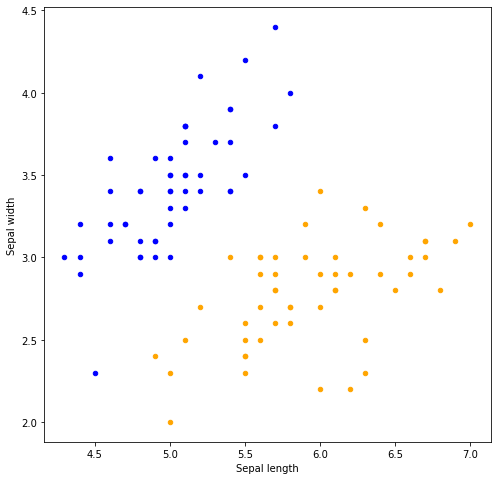

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
two_cols.loc[y == 0,:].plot(kind='scatter',x='Sepal length', y='Sepal width', ax = ax, color='blue')
two_cols.loc[y == 1,:].plot(kind='scatter',x='Sepal length', y='Sepal width', ax = ax, color='orange')
plt.show()

y = a_1*x_1 a_2*x_2+b

prediction for y is 1 if y > 0.5 else it's 0.

In [1]:
import numpy as np

class Perceptron:
  def __init__(self, lrate = 0.1, niter = 10):
    self.lrate = lrate
    self.niter = niter

  def fit(self,X,y):
    self.a_1 = 0.0
    self.a_2 = 0.0
    self.b = 0.0    
    for i in range(self.niter):
      for x_i, target in zip(X,y):
        update = (target - self.predict(x_i))/(len(x_i)+1)
        if update == 1.0:
          denom = 1 + x_i[0]**2 + x_i[1]**2
          self.a_1 += x_i[0]*self.lrate/denom
          self.a_2 += x_i[1]*self.lrate/denom
          self.b += self.lrate/denom
        elif update == -1.0:
          denom = 1 + x_i[0]**2 + x_i[1]**2
          self.a_1 -= x_i[0]*self.lrate/denom
          self.a_2 -= x_i[1]*self.lrate/denom
          self.b -= self.lrate/denom          
        elif update == 0.0:
          pass
        else: raise ValueError('target - predict should be -1,0,1')
    return None
  
  def predict(self,x_i):
    return np.where(self.net_input(x_i) >= 0.5, 1, 0)

  def net_input(self,x_i):
    return self.a_1*x_i[0] + self.a_2*x_i[1] + self.b

In [ ]:
pct = Perceptron()
pct.fit(two_cols.values,y)

In [ ]:
two_cols.loc[0,:].values

array([5.1, 3.5])

In [ ]:
pct.predict(two_cols.loc[0,:].values)

array(1)

In [ ]:
y[0]

0

In [ ]:
X_mod = two_cols[y!=2]

In [ ]:
y_mod = y[y!=2]

In [ ]:
pct = Perceptron()
pct.fit(X_mod.values,y)

0.5 = a_1*x_1 + a_2*x_2 + b

In [ ]:
pct.predict(X_mod.values[-1])

array(1)

In [ ]:
pct.net_input(X_mod.values[-1])

0.5955306224611231

In [ ]:
X_mod.values[-1]

array([5.7, 2.8])

In [ ]:
X_mod.values[1]

array([4.9, 3. ])

In [ ]:
pct.a_1*5.7+pct.a_2*2.8+pct.b

0.5955306224611231

In [ ]:
pct.a_1*4.9+pct.a_2*3+pct.b

0.5883872537440277

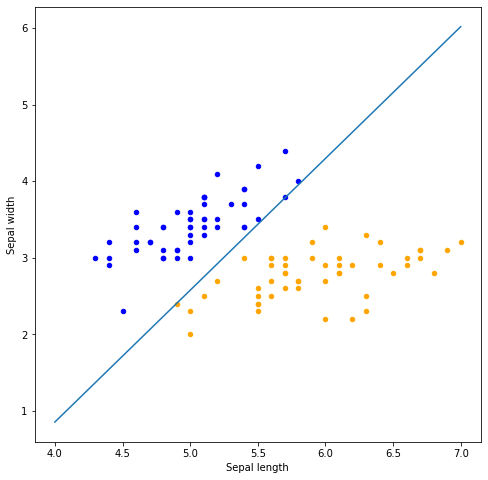

In [ ]:
import matplotlib.pyplot as plt
xx1 = np.linspace(4,7,100)
xx2 = (0.5 - pct.b - pct.a_1*xx1)/pct.a_2

fig, ax = plt.subplots(figsize=(8,8))
two_cols.loc[y == 0,:].plot(kind='scatter',x='Sepal length', y='Sepal width', ax = ax, color='blue')
two_cols.loc[y == 1,:].plot(kind='scatter',x='Sepal length', y='Sepal width', ax = ax, color='orange')
plt.plot(xx1,xx2)
plt.show()

In [ ]:
from mlxtend.plotting import decision_regions
?decision_regions

In [ ]:
??decision_regions

ValueError: ignored

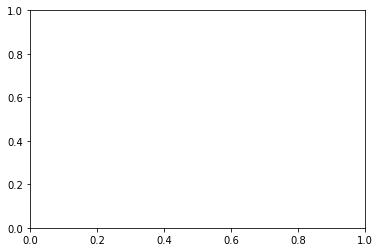

In [ ]:
decision_regions.plot_decision_regions(X_mod.values,y_mod,pct)

In [ ]:
pct.predict(X_mod.loc[0,:].values)

array(0)

In [ ]:
pct.predict(X_mod.loc[89,:].values)

array(1)

In [ ]:
correct = 0
for i in range(len(y_mod)):
  print(f'we predicted {pct.predict(X_mod.loc[i,:].values)}')
  print(f'y is really {y[i]}')
  if pct.predict(X_mod.loc[i,:].values) == y_mod[i]:
    print('we predicted correctly')
    correct += 1
  else:
    print('we predicted incorrectly')
print(f'we predicted {correct} out of {len(y_mod)} correctly.')

we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted

In [ ]:
correct = 0
for i in range(len(y_mod)):
  print(f'we predicted {pct.predict(X_mod.loc[i,:].values)}')
  print(f'y is really {y[i]}')
  if pct.predict(X_mod.loc[i,:].values) == y_mod[i]:
    print('we predicted correctly')
    correct += 1
  else:
    print('we predicted incorrectly')
print(f'we predicted {correct} out of {len(y_mod)} correctly.')
  


we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted 0
y is really 0
we predicted correctly
we predicted